Q1
A Classification Decision Tree is a machine learning algorithm used for classifying data into distinct categories. It is a tree-like structure where each internal node represents a decision based on a feature, each branch corresponds to an outcome of that decision, and each leaf node represents a class label or the final outcome
The main challenge it solves is decision-making: determining how to split data effectively based on feature values to maximize classification accuracy.
Real-World Applications
1. Medical Diagnosis
Problem: Predict whether a patient has a specific disease (e.g., diabetes, heart disease) based on symptoms and test results.
Example: Using features like blood pressure, cholesterol levels, and age to classify patients as "Diseased" or "Healthy."
2. Email Spam Detection
Problem: Classify emails as "Spam" or "Not Spam" based on keywords, sender information, or email structure.
Example: Identifying whether an email with certain words in the subject line is spam.
3. Customer Segmentation
Problem: Categorize customers into different groups based on purchasing behavior or demographics.
Example: Classifying customers as "Frequent Buyers," "Occasional Buyers," or "Non-Buyers" to target marketing efforts.
4. Credit Risk Assessment
Problem: Determine whether a loan applicant is "High Risk" or "Low Risk" based on financial history and demographic information.
Example: Banks use features like credit score, income, and repayment history to decide loan approval.
Classification Decision Tree: Makes predictions by assigning a data point to one of several predefined categories (discrete outputs).
Multiple Linear Regression: Makes predictions by estimating a continuous numerical value (real-valued outputs).
Key Differences in Prediction Methodology:
Aspect	Classification Decision Tree	Multiple Linear Regression
Task Type	Classification (discrete output)	Regression (continuous output)
Output	Class label or category	Real-valued numerical prediction
Decision Rule	Decision boundaries defined by feature splits	Linear combination of feature values
Interpretation	Tree paths explain predictions in terms of feature splits	Coefficients explain the strength of relationships
Complexity of Boundaries	Non-linear decision boundaries	Linear decision boundaries
https://chatgpt.com/share/673e3eaf-4214-8000-b10a-b3d34cca164e


Q2
Accuracy:in spam email filtering, because accuracy is suitable when both classes (positive and negative) are equally important
Sensitivity: Medical diagnosis for critical diseases like cancer screening, because high sensitivity ensures that most actual positive cases are identified, even if some false positives occur. This will keep all patients health to the largest extent
Specificity: Fraud detection in financial transactions, because specificity is important when the cost of false positives is high
Precision:targeted advertising campaigns, because precision matters when the focus is on minimizing false positives
SUMMARY
Accuracy: Used when both false positives and false negatives are equally important, e.g., spam email filtering.
Sensitivity: Critical in detecting serious conditions, e.g., cancer screening, where missing positives is costly.
Specificity: Essential when false positives are problematic, e.g., fraud detection in financial transactions.
Precision: Focuses on minimizing false positives, e.g., in targeted advertising to reach the right audience.
https://chatgpt.com/share/673e4092-ff78-8000-ac33-3e7c3958a86f

In [14]:
#Q3
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import graphviz as gv
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")
ab = ab.drop(columns=['Weight_oz', 'Width', 'Height'])
ab = ab.dropna()
ab['Pub year'] = ab['Pub year'].astype(int)
ab['NumPages'] = ab['NumPages'].astype(int)
ab['Hard_or_Paper'] = ab['Hard_or_Paper'].astype('category')
ab.to_csv('cleaned_amazonbooks.csv', index=False)
print(ab.head())
print(ab.info())
#https://chatgpt.com/share/673e4218-16e0-8000-bddb-cef1f03b242c

                                               Title           Author  \
0  1,001 Facts that Will Scare the S#*t Out of Yo...      Cary McNeal   
1  21: Bringing Down the House - Movie Tie-In: Th...      Ben Mezrich   
2       100 Best-Loved Poems (Dover Thrift Editions)            Smith   
3            1421: The Year China Discovered America    Gavin Menzies   
4    1493: Uncovering the New World Columbus Created  Charles C. Mann   

   List Price  Amazon Price Hard_or_Paper  NumPages           Publisher  \
0       12.95          5.18             P       304         Adams Media   
1       15.00         10.20             P       273          Free Press   
2        1.50          1.50             P        96  Dover Publications   
3       15.99         10.87             P       672    Harper Perennial   
4       30.50         16.77             P       720               Knopf   

   Pub year     ISBN-10  Thick  
0      2010  1605506249    0.8  
1      2008  1416564195    0.7  
2      1995

Training data set size: 255
Testing data set size: 64


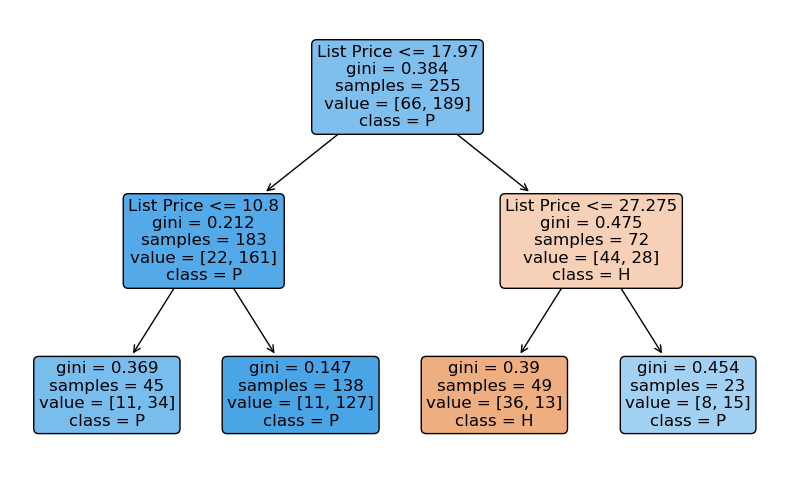

In [15]:
#Q4
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Load the dataset from the provided URL
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

# Clean the dataset as per previous instructions
ab = ab.drop(columns=['Weight_oz', 'Width', 'Height'])
ab = ab.dropna()
ab['Pub year'] = ab['Pub year'].astype(int)
ab['NumPages'] = ab['NumPages'].astype(int)
ab['Hard_or_Paper'] = ab['Hard_or_Paper'].astype('category')

# Step 1: Create an 80/20 split (80% training, 20% testing)
ab_reduced_noNaN_train, ab_reduced_noNaN_test = train_test_split(ab, test_size=0.2, random_state=42)

# Report on the number of observations in the training and testing datasets
print(f"Training data set size: {ab_reduced_noNaN_train.shape[0]}")
print(f"Testing data set size: {ab_reduced_noNaN_test.shape[0]}")

# Step 2: Fit a DecisionTreeClassifier using 'List Price' to predict 'Hard_or_Paper'
X_train = ab_reduced_noNaN_train[['List Price']]  # Feature (List Price)
y_train = ab_reduced_noNaN_train['Hard_or_Paper']  # Target (Hard_or_Paper)

# Initialize the model with max_depth = 2
clf = DecisionTreeClassifier(max_depth=2, random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Step 3: Visualize the decision tree
plt.figure(figsize=(10, 6))
plot_tree(clf, filled=True, feature_names=['List Price'], class_names=clf.classes_, rounded=True, fontsize=12)
plt.show()
#https://chatgpt.com/share/673e4218-16e0-8000-bddb-cef1f03b242c

Training data set size: 255
Testing data set size: 64


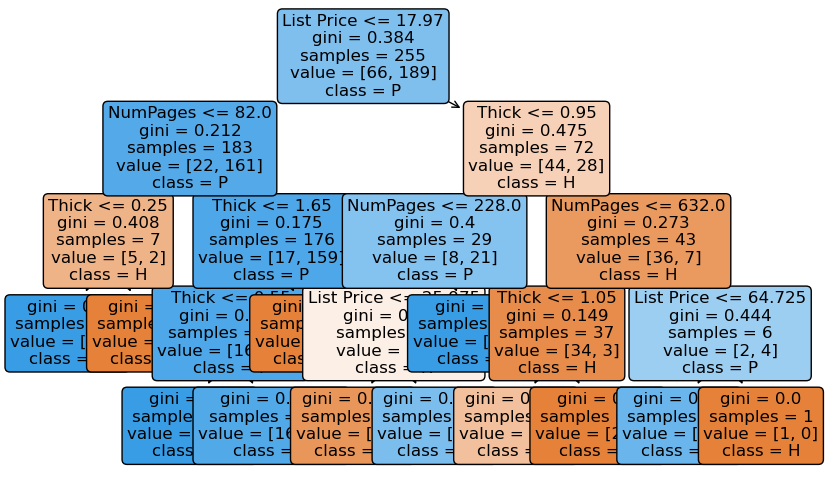

In [16]:
#Q5
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Load the dataset from the provided URL
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

# Clean the dataset as per previous instructions
ab = ab.drop(columns=['Weight_oz', 'Width', 'Height'])
ab = ab.dropna()
ab['Pub year'] = ab['Pub year'].astype(int)
ab['NumPages'] = ab['NumPages'].astype(int)
ab['Hard_or_Paper'] = ab['Hard_or_Paper'].astype('category')

# Step 1: Create an 80/20 split (80% training, 20% testing)
ab_reduced_noNaN_train, ab_reduced_noNaN_test = train_test_split(ab, test_size=0.2, random_state=42)

# Report on the number of observations in the training and testing datasets
print(f"Training data set size: {ab_reduced_noNaN_train.shape[0]}")
print(f"Testing data set size: {ab_reduced_noNaN_test.shape[0]}")

# Step 2: Fit a DecisionTreeClassifier using 'List Price' to predict 'Hard_or_Paper'
X_train = ab_reduced_noNaN_train[['NumPages', 'Thick', 'List Price']]
y_train = ab_reduced_noNaN_train['Hard_or_Paper']  # Target (Hard_or_Paper)

# Initialize the model with max_depth = 2
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)

# Train the model
clf2.fit(X_train, y_train)

# Step 3: Visualize the decision tree
plt.figure(figsize=(10, 6))
plot_tree(clf2, filled=True, feature_names=['NumPages', 'Thick', 'List Price'], class_names=clf2.classes_, rounded=True, fontsize=12)
plt.show()

In [17]:
#Q6
from sklearn.metrics import confusion_matrix
# Step 4: Prepare test data for evaluation
X_test = ab_reduced_noNaN_test[['NumPages', 'Thick', 'List Price']]
y_test = ab_reduced_noNaN_test['Hard_or_Paper']

# For the first model clf (using 'List Price' as feature)
X_test_clf = ab_reduced_noNaN_test[['List Price']]
y_pred_clf = clf.predict(X_test_clf)
cm_clf = confusion_matrix(y_test, y_pred_clf)

# For the second model clf2 (using 'NumPages', 'Thick', 'List Price' as features)
y_pred_clf2 = clf2.predict(X_test)
cm_clf2 = confusion_matrix(y_test, y_pred_clf2)

# Define a function to calculate sensitivity, specificity, and accuracy from confusion matrix
def calculate_metrics(cm):
    TP = cm[1, 1]  # True Positives
    TN = cm[0, 0]  # True Negatives
    FP = cm[0, 1]  # False Positives
    FN = cm[1, 0]  # False Negatives

    sensitivity = TP / (TP + FN) if (TP + FN) != 0 else 0
    specificity = TN / (TN + FP) if (TN + FP) != 0 else 0
    accuracy = (TP + TN) / (TP + TN + FP + FN)

    return sensitivity, specificity, accuracy

# Calculate metrics for clf
sensitivity_clf, specificity_clf, accuracy_clf = calculate_metrics(cm_clf)
print(f"Model 1 (clf) - Sensitivity: {sensitivity_clf:.2f}, Specificity: {specificity_clf:.2f}, Accuracy: {accuracy_clf:.2f}")

# Calculate metrics for clf2
sensitivity_clf2, specificity_clf2, accuracy_clf2 = calculate_metrics(cm_clf2)
print(f"Model 2 (clf2) - Sensitivity: {sensitivity_clf2:.2f}, Specificity: {specificity_clf2:.2f}, Accuracy: {accuracy_clf2:.2f}")


Model 1 (clf) - Sensitivity: 0.91, Specificity: 0.70, Accuracy: 0.84
Model 2 (clf2) - Sensitivity: 0.91, Specificity: 0.75, Accuracy: 0.86


Q7
The differences between the two confusion matrices arise from the features used for prediction in each model.clf uses only the 'List Price' as a feature, while clf2 uses additional features ('NumPages' and 'Thick') along with 'List Price', allowing the model to capture more relationships and patterns, which generally improves its accuracy.The confusion matrices for the two models (clf and clf2) are better because they are based on the test set data and use features that are more comprehensive
SUMMARY
The differences between the confusion matrices stem from the number of features used in each model. The first model (clf), using only 'List Price', may misclassify more instances, leading to lower accuracy. The second model (clf2), which uses 'NumPages', 'Thick', and 'List Price', captures more information and provides better predictions. As a result, the confusion matrices for the two models on the test set show improved sensitivity, specificity, and accuracy for clf2, making it a more effective model than clf.
https://chatgpt.com/share/673e484f-d3a8-8000-a3d4-5e3638312227